# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [80]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [81]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('/Users/srinivas/Downloads/cms_hospital_readmissions.csv')
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


****
## Preliminary Analysis

In [82]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


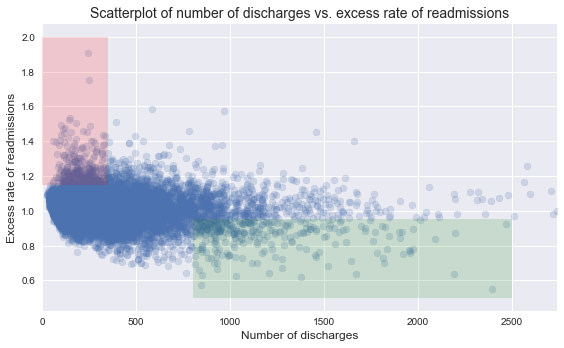

In [112]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# Your turn
Listed below are my views/ opinion regarding the analysis and recommendations.

1) Analysis suggests that Hospitals with large number of discharges have less readmission rate in comparison to those with lesser capacity. 
This assertion can be validated by finding a ratio of (Number of hospitals above XXX capacity/ number of readmission for the hospitals with XXX capacity). 
We can divide the whole dataset into 3 categories and find the ratio for each of them i.e. 
    (A) Hospitals with capacity less than 400 
    (B) Hospitals with capacity of 400 to 1000
    (C) Hospitals with capacity of more than 1000
    
    This ratio would be helpful in determining the category that requires more quality controls and assistance.
    
2) Based on the above analysis, we can conclude whether upgraded resource allocation is required  ONLY for hospitals with admissions < 300?
As such, it is better to conduct regular audits at all hospitals having "Excess readmission ratio" > 1
    
3) Last point under conclusion assumes that hospitals with lesser capacities are prone to have excess readmissions because of 
skill/ resource shortage and that they need to be consolidated into larger hospitals / facilities. But it doesnt consider
facts such as: 
    (A) There could be smaller hospitals that are better equipped in treating patients.
    (B) Location of Hospitals plays a key role in number of readmissions - Hospitals near retirement villages are prone to 
    have relatively more readmissions due to ageing population.
    
    (C) Due to the above reasons, Consolidation of smaller hospitals into a larger facility might result in increase of readmission rate in these larger
    facilities. 

In [104]:
#############################
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff
#############################
""" Test Hypothesis - whether Hospitals having <= 500 discharges have high readmission rate compared to hospitals with discharges >= 1000 """
""" Test Statistic - Difference in Means """
#############################

hospital_le_500 = hospital_read_df[hospital_read_df['Number of Discharges'] <= '500' ]
hospital_le_500 = hospital_le_500.loc[hospital_le_500['Excess Readmission Ratio'].notnull()]
hospital_le_500.info()

hospital_ge_1000 = hospital_read_df[hospital_read_df['Number of Discharges'] >= '1000' ]
hospital_ge_1000 = hospital_ge_1000.loc[hospital_ge_1000['Excess Readmission Ratio'].notnull()]
hospital_ge_1000.info()

hosp_le_500 = np.array(hospital_le_500['Excess Readmission Ratio'])
disch_le_500 = np.array(hospital_le_500['Number of Discharges'])

hosp_ge_1000 = np.array(hospital_ge_1000['Excess Readmission Ratio'])
disch_ge_1000 = np.array(hospital_ge_1000['Number of Discharges'])

#print(hosp_le_500)
print('Mean of ER(Excess readmissions) for hospitals <= 500 discharges: ', np.mean(hosp_le_500))
print('Mean of ER for hospitals >= 1000 discharges: ', np.mean(hosp_ge_1000))
actual_difference_means = diff_of_means(hosp_le_500,hosp_ge_1000)
print('Difference of means in Excess readmissions ratio: ', actual_difference_means)

### There is not much difference between the ERR (Excess readmission ratio) mean of smaller and larger disharge hospitals 
### which suggests that hospitals with discharges <=500 may not be at fault due to readmissions. 
### In fact, if we compare the total number of hospitals, we have:
###        Mean ERR of 1.008 for 8287 hospitals with discharges <=500
###        Whereas we have ERR of 1.002 for 13697 hospitals  having discharge >= 1000 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8287 entries, 0 to 13730
Data columns (total 12 columns):
Hospital Name                 8287 non-null object
Provider Number               8287 non-null int64
State                         8287 non-null object
Measure Name                  8287 non-null object
Number of Discharges          8287 non-null object
Footnote                      0 non-null float64
Excess Readmission Ratio      8287 non-null float64
Predicted Readmission Rate    8287 non-null float64
Expected Readmission Rate     8287 non-null float64
Number of Readmissions        8287 non-null float64
Start Date                    8287 non-null object
End Date                      8287 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 841.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13696 entries, 0 to 13730
Data columns (total 12 columns):
Hospital Name                 13696 non-null object
Provider Number               13696 non-null int64
Sta

In [113]:
"""We will conduct bootstrap replicate hypothesis to check whether the observed mean and corresponding P-Value """
#############################
# Combine the Black and White calls before drawing random data
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2
#############################
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates
#############################
# Draw 10,000 permutation replicates: perm_replicates
observed_repl_mean = draw_perm_reps(hosp_le_500,hosp_ge_1000,
                                 diff_of_means, size=10000)
p_bootHyp = np.sum(observed_repl_mean >= actual_difference_means) / len(observed_repl_mean)
print('P Value is: = ', p_bootHyp )

# Inference of P-Value
### 1) A p-Value of 0.0 suggests that there may not be significant difference in test statistics(Difference in means) of observed value (boostrap replicates)
### and the actual value (0.005), which proves the fact that facilities and resources in smaller hospitals (hospitals with discharge <= 500) may not be 
### in par with their larger counterparts (hospitals with discharge >= 1000). In other words, there is no correlation between
### discharge capacity of the hospital and its readmission rate.

### 2) Considering the statistical significance of α = .01, we conclude that P (=0.0) is less than alpha and so, the hypothesis 
###    that there is "correlation between discharge capacity of the hospital and its readmission rate" is INCORRECT.

P Value is: =  0.0


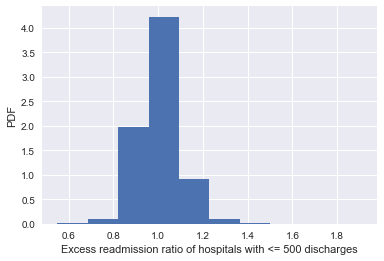

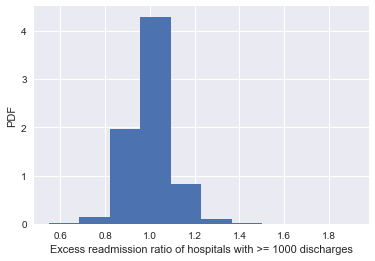

In [126]:
sns.set()

# Make a histogram of the hospitals with LE 500 discharge
_ = plt.hist(hosp_le_500,bins=10, normed=True)
_ = plt.xlabel('Excess readmission ratio of hospitals with <= 500 discharges')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

# Make a histogram of the hospitals with GE 1000 discharge
_ = plt.hist(hosp_ge_1000,bins=10, normed=True)
_ = plt.xlabel('Excess readmission ratio of hospitals with >= 1000 discharges')
_ = plt.ylabel('PDF')
plt.show()


""" Upon analysing the PDF distribution in hisograms, it looks like the Excess readmission ratio of both smaller and larger 
discharge hospitals appear to be the same."""